# Project 1 - Main Code
# Meal Planning via Data

# Nathan Bach, Sean Stroh, Sean Hoffman, 
# Blake Wilfong, Christine Robicheaux

Dependencies

In [ ]:
# dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

Cleansing of USDA SuperTracker_FoodDatabase

In [ ]:
portions = 'Data_Sets/Portions.csv'
portion_data = 'Data_Sets/Portion_data.csv'
nutrients = 'Data_Sets/Nutrients.csv'
categories = 'Data_Sets/Search_Categories.csv'

portions_df = pd.read_csv(portions)
portion_data_df = pd.read_csv(portion_data)
nutrients_df = pd.read_csv(nutrients)
categories_df = pd.read_csv(categories)

In [ ]:
# pare down columns
nutrients_pare_df = nutrients_df.loc[:, ["Food_Item_ID","modcode","foodcode","foodname","_203 Protein (g)",
                      "_204 Total Fat (g)","_205 Carbohydrate (g)","_208 Energy (kcal)","_601 Cholesterol (mg)",
                      "_606 Fatty acids, total saturated (g)","Calc_Total_Fat_Prct","Calc_Protein_Prct","Calc_Carb_Prct"]]

# rename columns
nutrients_pare_df = nutrients_pare_df.rename(columns={"Food_Item_ID":"Food Item ID",
                            "modcode":"ModCode",
                            "foodcode":"Food Code",
                            "foodname":"Food",
                            "_203 Protein (g)":"Proteins (g)",
                            "_204 Total Fat (g)":"Fats (g)",
                            "_205 Carbohydrate (g)":"Carbs (g)",
                            "_208 Energy (kcal)":"Calories",
                            "_601 Cholesterol (mg)":"Cholesterol",
                            "_606 Fatty acids, total saturated (g)":"Saturated Fats (g)",
                            "Calc_Total_Fat_Prct":"Total Fat (% Calories)",
                            "Calc_Protein_Prct":"Total Protein (% Calories)",
                            "Calc_Carb_Prct":"Total Carbohydrate (% Calories)"
                                           })

nutrients_pare_df = nutrients_pare_df.dropna(how='any')

nutrients_pare_df["Food Item ID"] = nutrients_pare_df.loc[:, "Food Item ID"].astype('int64')
nutrients_pare_df

In [ ]:
# Drop all rows with missing information
nutrients_pare_df = nutrients_pare_df.dropna(how='any')
nutrients_pare_df.count()

In [ ]:
# Convert lookup fields from float to int
nutrients_pare_df["Food Item ID"] = nutrients_pare_df.loc[:, "Food Item ID"].astype('int64')
nutrients_pare_df["ModCode"] = nutrients_pare_df.loc[:, "ModCode"].astype('int64')
nutrients_pare_df["Food Code"] = nutrients_pare_df.loc[:, "Food Code"].astype('int64')
nutrients_pare_df

In [ ]:
# Remove duplicate records from nutrients table
nutrients_pare_df.drop_duplicates(subset ="Food Code",keep = 'first', inplace = True)
nutrients_pare_df

In [ ]:
# pare down columns from categories data set
categories_df = categories_df[["foodcode","foodname","Beverages",
                      "Breads, cereals, bakery items","Pasta and rice*","Fruits*","Vegetables*",
                      "Dairy*","Meat, poultry, fish, eggs, and soy*","Meals and entrees (mixed dishes)","Snacks",
                      "Additions to foods**","Fast foods","Sweets and desserts","Recipe Ingredients"]]
# rename columns
categories_df = categories_df.rename(columns={
                            "foodcode":"Food Code",
                            "foodname":"Food",
                            "Beverages":"Beverages",
                            "Breads, cereals, bakery items":"Breads",
                            "Pasta and rice*":"Starch",
                            "Fruits*":"Fruits",
                            "Vegetables*":"Vegetables",
                            "Dairy*":"Dairy",
                            "Meat, poultry, fish, eggs, and soy*":"Proteins",
                            "Meals and entrees (mixed dishes)":"Meals",
                            "Snacks":"Snacks",
                            "Additions to foods**":"Other",
                            "Fast foods":"FastFood",
                            "Sweets and desserts":"Sweets",
                            "Recipe Ingredients":"Recipe"
                                           })
# Remove duplicate values
categories_df.drop_duplicates(subset ="Food Code",keep = 'first', inplace = True)
categories_df

In [ ]:
# merge table data for nutrients data and categories
nutrition_merge_df = pd.merge(nutrients_pare_df, categories_df, on="Food Code", how="left")
nutrition_merge_df

In [ ]:
# remove duplicate values from portions data, and pare down the columns
portions_df.drop_duplicates(subset ="portion_code",keep = 'first', inplace = True)
portions_df = portions_df.loc[:, ["portion_code","portiondesc"]]
portions_df

In [ ]:
# sort the portion data on "Use by default" field, remove duplicate values, then pare down the columns

portion_data_df = portion_data_df.sort_values(by='Use as default', ascending=False)
portion_data_df.drop_duplicates(subset ="foodcode",keep = 'first', inplace = True)

portion_data_df = portion_data_df.sort_values(by='foodcode', ascending=True)
portion_data_df = portion_data_df.loc[:, ["foodcode","foodname","portion_code","portionwgt","portiondesc"]]
portion_data_df = portion_data_df.rename(columns={
                            "foodcode":"Food Code",
                            "foodname":"Food",
                            "portion_code":"Portion_Code",
                            "portionwgt":"Gram_Weight",
                            "portiondesc":"Portion_Desc"
                            })
portion_data_df

In [ ]:
# merge table data for nutrients data and portions
nutrients_merge_df = pd.merge(nutrition_merge_df, portion_data_df, on = 'Food Code', how = 'left')
nutrients_merge_df

In [ ]:
# fill in the null values that imported from the categories data to obtain better select criteria
nutrients_clean = nutrients_merge_df.fillna(0)
nutrients_clean

In [ ]:
# ensure that data types within the dataframe are clean
nutrients_clean["Food_x"] = nutrients_clean.loc[:, "Food_x"].astype('str')
nutrients_clean["Total Carbohydrate (% Calories)"] = nutrients_clean.loc[:, "Total Carbohydrate (% Calories)"].astype('float64')
nutrients_clean["Food_y"] = nutrients_clean.loc[:, "Food_y"].astype('str')
nutrients_clean["Beverages"] = nutrients_clean.loc[:, "Beverages"].astype('str')
nutrients_clean["Breads"] = nutrients_clean.loc[:, "Breads"].astype('str')
nutrients_clean["Starch"] = nutrients_clean.loc[:, "Starch"].astype('str')
nutrients_clean["Fruits"] = nutrients_clean.loc[:, "Fruits"].astype('str')
nutrients_clean["Vegetables"] = nutrients_clean.loc[:, "Vegetables"].astype('str')
nutrients_clean["Dairy"] = nutrients_clean.loc[:, "Dairy"].astype('str')
nutrients_clean["Proteins"] = nutrients_clean.loc[:, "Proteins"].astype('str')
nutrients_clean["Meals"] = nutrients_clean.loc[:, "Meals"].astype('str')
nutrients_clean["Snacks"] = nutrients_clean.loc[:, "Snacks"].astype('str')
nutrients_clean["Other"] = nutrients_clean.loc[:, "Other"].astype('str')
nutrients_clean["FastFood"] = nutrients_clean.loc[:, "FastFood"].astype('str')
nutrients_clean["Sweets"] = nutrients_clean.loc[:, "Sweets"].astype('str')
nutrients_clean["Recipe"] = nutrients_clean.loc[:, "Recipe"].astype('str')
nutrients_clean["Food"] = nutrients_clean.loc[:, "Food"].astype('str')
nutrients_clean["Portion_Desc"] = nutrients_clean.loc[:, "Portion_Desc"].astype('str')

In [ ]:
# Remove outlier data for anomalous recipe ingredient foods such as Baking Powder, Salt, Ground White Pepper, and Vanilla Extract

suppressions_df = nutrients_clean.loc[~((nutrients_clean["Beverages"] == '0') & 
                                     (nutrients_clean["Breads"] == '0') & 
                                     (nutrients_clean["Starch"] == '0') & 
                                     (nutrients_clean["Fruits"] == '0') & 
                                     (nutrients_clean["Vegetables"] == '0') & 
                                     (nutrients_clean["Dairy"] == '0') & 
                                     (nutrients_clean["Proteins"] == '0') & 
                                     (nutrients_clean["Meals"] == '0') & 
                                     (nutrients_clean["Snacks"] == '0') & 
                                     (nutrients_clean["Other"] == 'X') & 
                                     (nutrients_clean["FastFood"] == '0') & 
                                     (nutrients_clean["Sweets"] == '0') & 
                                     (nutrients_clean["Recipe"] == 'X') 
                                       ),:]
suppressions_df = suppressions_df.loc[~((nutrients_clean["Beverages"] == '0') & 
                                     (nutrients_clean["Breads"] == '0') & 
                                     (nutrients_clean["Starch"] == '0') & 
                                     (nutrients_clean["Fruits"] == '0') & 
                                     (nutrients_clean["Vegetables"] == '0') & 
                                     (nutrients_clean["Dairy"] == '0') & 
                                     (nutrients_clean["Proteins"] == '0') & 
                                     (nutrients_clean["Meals"] == '0') & 
                                     (nutrients_clean["Snacks"] == '0') & 
                                     (nutrients_clean["Other"] == '0') & 
                                     (nutrients_clean["FastFood"] == '0') & 
                                     (nutrients_clean["Sweets"] == '0') & 
                                     (nutrients_clean["Recipe"] == 'X') 
                                       ),:]
suppressions_df

In [ ]:
# pare down columns
suppressions_df = suppressions_df.loc[:, ["Food Code","Food_x","Proteins (g)","Fats (g)","Carbs (g)","Calories",
                                          "Cholesterol","Saturated Fats (g)","Total Fat (% Calories)","Total Protein (% Calories)",
                                          "Total Carbohydrate (% Calories)","Beverages","Breads","Starch","Fruits",
                                          "Vegetables","Dairy","Proteins","Meals","Snacks","Other",
                                          "FastFood","Sweets","Recipe","Portion_Code","Gram_Weight","Portion_Desc"]]
suppressions_df = suppressions_df.rename(columns={
                            "Food_x":"Food"})
suppressions_df

In [ ]:
# assign categories to a list by running a loop through the dataframe that compares the percentage of calories that come
# from Fat, Protein, and Carbohydrate to determine which category a food belongs in. Write that list back to the dataframe.

category = []

for i, row in suppressions_df.iterrows():
    if (row["Total Fat (% Calories)"] >= row["Total Protein (% Calories)"]) & 
       (row["Total Fat (% Calories)"] >= row["Total Carbohydrate (% Calories)"]):
        category.append("Fats")
    elif (row["Total Protein (% Calories)"] > row["Total Fat (% Calories)"]) & 
         (row["Total Protein (% Calories)"] > row["Total Carbohydrate (% Calories)"]):
        category.append("Proteins")
    elif (row["Total Carbohydrate (% Calories)"] > row["Total Fat (% Calories)"]) & 
         (row["Total Carbohydrate (% Calories)"] > row["Total Protein (% Calories)"]):
        category.append("Carbs")
    else:
        category.append("Other")

suppressions_df["Category"] = category

suppressions_df.head()

In [ ]:
# pare down the dataframe one final time and prepare for export to CSV.
final_nutrients = suppressions_df.loc[:,[
    "Food Code","Category","Food","Proteins (g)","Fats (g)","Carbs (g)","Calories","Cholesterol","Saturated Fats (g)",
    "Total Fat (% Calories)","Total Protein (% Calories)","Total Carbohydrate (% Calories)","Gram_Weight","Portion_Desc"
]]
final_nutrients

In [ ]:
# export the final_nutrients dataframe to a CSV file to be used in our program

final_nutrients.to_csv('Data_Sets/final_nutrients.csv')

Data Staging for plotting of macronutrients

In [2]:
# read csv and turn into DF
nutrients_df = pd.read_csv("Data_Sets/final_nutrients.csv")
nutrients_df

,Unnamed: 0,Food Code,Category,Food,Proteins (g),Fats (g),Carbs (g),Calories,Cholesterol,Saturated Fats (g),Total Fat (% Calories),Total Protein (% Calories),Total Carbohydrate (% Calories),Gram_Weight,Portion_Desc
0,0,11111000,Fats,"Milk, whole",3.1499,3.2500,4.7999,61.0,10.0,1.8650,47.9508,20.6551,31.4748,244.0,cup
1,1,11111100,Fats,"Milk, whole, low-sodium",3.1000,3.4599,4.4599,61.0,14.0,2.1539,51.0477,20.3279,29.2452,244.0,cup
2,2,11111150,Fats,"Milk, whole, calcium fortified",3.1499,3.2500,4.7999,61.0,10.0,1.8650,47.9508,20.6551,31.4748,247.0,cup
3,3,11111160,Carbs,"1% milk, calcium fortified",3.3700,0.9700,4.9900,42.0,5.0,0.6330,20.7857,32.0952,47.5238,247.0,cup
4,4,11111170,Carbs,"Fat free milk, calcium fortified",3.3999,0.1800,4.8498,35.0,2.0,0.1170,4.6286,38.8560,55.4263,247.0,cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,5660,95312560,Carbs,Ocean Spray cran-energy cranberry energy juice...,0.0000,0.0000,3.7500,15.0,0.0,0.0000,0.0000,0.0000,100.0000,360.0,bottle (12 fl oz)
5277,5661,95312900,Carbs,XS energy drink,0.2500,0.0800,0.7000,5.0,0.0,0.0000,14.4000,20.0000,56.0000,252.0,can (8.3 fl oz)
5278,5662,95312905,Carbs,XS Gold Plus energy drink,0.2500,0.0800,0.7000,5.0,0.0,0.0000,14.4000,20.0000,56.0000,252.0,can (8.3 fl oz)
5279,5663,95341000,Carbs,FUZE Slenderize fortified low calorie fruit ju...,0.0000,0.0000,0.7000,4.0,0.0,0.0000,0.0000,0.0000,70.0000,555.0,bottle


In [3]:
# run a count to test data
nutrients_df["Category"].value_counts()

Carbs       3185
Fats        1589
Proteins     505
Other          2
Name: Category, dtype: int64

In [4]:
# create new DFs for each food category
carbs_df = nutrients_df[nutrients_df["Category"] == "Carbs"]
proteins_df = nutrients_df[nutrients_df["Category"] == "Proteins"]
fats_df = nutrients_df[nutrients_df["Category"] == "Fats"]

Macronutrient Plotting - Nutrient vs. Caloric Content

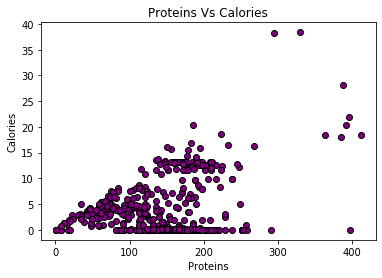

In [24]:
plt.scatter(proteins_df["Calories"],proteins_df["Carbs (g)"],edgecolors="black",facecolors="purple")
plt.title("Proteins Vs Calories")
plt.xlabel("Proteins")
plt.ylabel("Calories")
plt.savefig("Images/proteins_scatter.png")
plt.show()

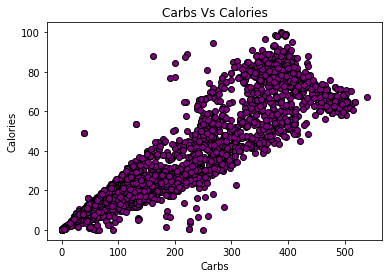

In [25]:
plt.scatter(carbs_df["Calories"],carbs_df["Carbs (g)"],edgecolors="black",facecolors="purple")
plt.title("Carbs Vs Calories")
plt.xlabel("Carbs")
plt.ylabel("Calories")
plt.savefig("Images/carbs_scatter.png")
plt.show()

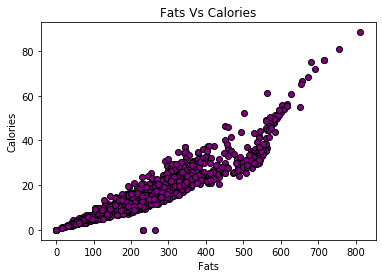

In [26]:
plt.scatter(fats_df["Calories"],fats_df["Fats (g)"],edgecolors="black",facecolors="purple")
plt.title("Fats Vs Calories")
plt.xlabel("Fats")
plt.ylabel("Calories")
plt.savefig("Images/fats_scatter.png")
plt.show()

Select random row from each macronutrient category to generate a meal

In [16]:
# uses the same code as above but renames variables to keep original DFs intact
# this section runs a loop through each DF and selects a random food item based on food category
random_carb2 = nutrients_df[nutrients_df["Category"] == "Carbs"].sample(n=1)
random_protein2 = nutrients_df[nutrients_df["Category"] == "Proteins"].sample(n=1)
random_fats2 = nutrients_df[nutrients_df["Category"] == "Fats"].sample(n=1)

# loop for carbs DF
for i, row in random_carb2.iterrows():
    if row["Category"] == "Carbs":
        a = row["Food"]
        b = row["Proteins (g)"]
        c = row["Fats (g)"]
        d = row["Carbs (g)"]
        e = row["Calories"]
        f = row["Portion_Desc"]

# loop for proteins df
for i, row in random_protein2.iterrows():
    if row["Category"] == "Proteins":
        a1 = row["Food"]
        b1 = row["Proteins (g)"]
        c1 = row["Fats (g)"]
        d1 = row["Carbs (g)"]
        e1 = row["Calories"]
        f1 = row["Portion_Desc"]
    
# loop for fats df
for i, row in random_fats2.iterrows():
    if row["Category"] == "Fats":
        a2 = row["Food"]
        b2 = row["Proteins (g)"]
        c2 = row["Fats (g)"]
        d2 = row["Carbs (g)"]
        e2 = row["Calories"]
        f2 = row["Portion_Desc"]

# creates a dictionary to populate random selections from above code
meal = {"Food":[a,a1,a2],
         "Proteins (g)":[b,b1,b2],
         "Fats":[c,c1,c2],
         "Carbs":[d,d1,d2],
         "Calories":[e,e1,e2],
         "Portion":[f,f1,f2]
          }

# creates new DF from the above dictionary
meal_df = pd.DataFrame(meal)
meal_df

,Food,Proteins (g),Fats,Carbs,Calories,Portion
0,"Couscous, plain, cooked (with salt and margarine)",3.5699,5.5998,21.8500,154.0,cup
1,"Tuna salad, with light ranch dressing",10.0800,1.1698,7.2698,78.0,cup
2,"Ravioli, meat filled, with cream sauce",10.1300,8.5600,13.4400,174.0,cup


Plot a pie-chart that shows the caloric portion percentage value for the selected meal

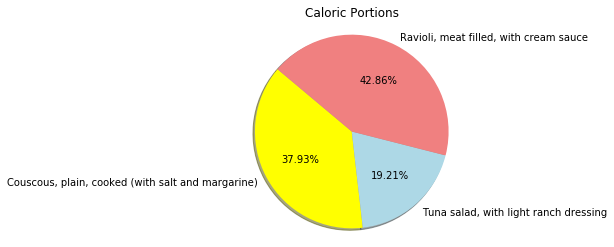

In [23]:
food = [meal_df["Food"].iloc[0], meal_df["Food"].iloc[1], meal_df["Food"].iloc[2]]
calories = [meal_df["Calories"].iloc[0], meal_df["Calories"].iloc[1], meal_df["Calories"].iloc[2]]
colors = ["yellow","lightblue","lightcoral"]
plt.pie(calories, labels=food, colors=colors,autopct="%.2f%%",shadow=True, startangle=140)
plt.title("Caloric Portions")
plt.axis("equal")
plt.savefig("Images/calorie_pie.png")
plt.show()

Generate caloric burn data for a person given a set of user input

In [ ]:
bodyfat = pd.read_csv("Data_Sets/Bodyfat.csv")
bodyfat

In [ ]:
#import bodyweight for rest burn for males 


standaterdmaledayburn = pd.read_csv("Data_Sets/weightlossmen.csv")
standaterdmaledayburn


In [ ]:
#import bodyweight for rest burn for females 

femaledayburn= pd.read_csv("Data_Sets/weightlosswomen.csv")
femaledayburn



In [ ]:
#weight input

wwi=input('what is your weight in pounds')

In [ ]:
#age input
agei= input("whats your age you")

In [ ]:
#workoput time input fake

workouttime=input("how long did you work out dont lie to me ")

In [ ]:
#workoput time input real
workouttime2=input("Really tell me how long in to the nearest hour you actuly worked out for " )

In [ ]:
#fitbit input for heart rate during the workout 
hri=input("what was your avarage heart rate during your workout")

In [ ]:
#gender input 

sex=input("whats your gender m/f")

In [ ]:
#weight rounded to the nearest 20 pounds to match the csv

winpounds= int(20*round(float(wwi)/20.))

#Heart rate veriable
HR = float(hri)
#weight veriable 
W = winpounds/2.2046
#age veriable
A = float(agei)
#time veriable 
T = float(workouttime2)
#create a fork too use the chart 


if sex == "m":
#male    
    caloricburn = ((-55.0969 + (0.6309 * HR) + (0.1988 * W) + (0.2017 * A))/4.184) * 60 * T
else:
#female    
    caloricburn = ((-20.4022 + (0.4472 * HR) - (0.1263 * W) + (0.074 * A))/4.184) * 60 * T

caloricburn

In [ ]:
#sleep input

sleep=input("how many hours do you sleep a night")

In [ ]:
#standing input
stand=input("how many hours do you stand rounded to the neriest hour")


In [ ]:
#sitting input 
sit=input("how many hours do you sit in a day to the neriest hour")

In [ ]:
#resting veriables  


hoursslept= float(sleep)

hoursstanding= float(stand)

hoursworkingout= T

Hourssitting = float(sit)
#diffrentiate the male v female sitting burn

if sex == "m":
    for i, row in standaterdmaledayburn.iterrows():
        if row[0]== winpounds:
                a=row["Calories burned after 8 hours of sitting"]
                b=row['Difference in calories burned per hour']
else:  
    for i, row in femaledayburn.iterrows():
        if row[0]== winpounds:
                a=row["Calories burned after 8 hours of sitting"]
                b=row['Difference in calories burned per hour']
    
        
st=hoursstanding/8
s=Hourssitting/8
z=hoursslept/8  
st1=(a*st)+((b*hoursstanding))

y= (a*z)+(a*s) + caloricburn +st1




        
print(y)



  #   Final Presentation - URL to slide show is below

In [ ]:
https://docs.google.com/presentation/d/1KLi5q0TCBTiYK-MmorVtA_TLxHw6Yx0QxE3zbSThkT4/edit#slide=id.g76b0c3ddd2_2_134